<a href="https://colab.research.google.com/github/LEFT-BEE/small_project/blob/main/dogs_Vs_cats_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import *

import numpy as np
import os ,glob
import matplotlib.pyplot as plt

In [2]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hanseungjin","key":"846d5bf6dc07302ec1dce37a20a41933"}'}

In [3]:
import zipfile 

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d tongpython/cat-and-dog

with zipfile.ZipFile('/content/cat-and-dog.zip', 'r') as existing_zip:
    existing_zip.extractall('/content')

 94% 204M/218M [00:03<00:00, 44.5MB/s]
100% 218M/218M [00:03<00:00, 67.8MB/s]


In [5]:
train_dir = "/content/training_set/training_set"
test_dir = "/content/test_set/test_set"

categories = ["cats" , "dogs"]
nb_classes = len(categories)

image_w = 64
image_h = 64
CHANNEL = 3
pixels = image_w * image_h * CHANNEL

In [6]:
X = []
Y = []

for idx , cat in enumerate(categories):
  label = [0 for i in range(len(categories))]
  label[idx] = 1

  image_dir = train_dir + "/" + cat
  files = glob.glob(image_dir + "/*.jpg")
  for i,f in enumerate(files):
    img = Image.open(f)
    img = img.convert('RGB')
    img = img.resize((image_w , image_h))
    data = np.asarray(img)
    X.append(data)
    Y.append(label)
    if i%100 == 0:
      print(i , "\n")

X = np.array(X)
Y = np.array(Y)

0 

100 

200 

300 

400 

500 

600 

700 

800 

900 

1000 

1100 

1200 

1300 

1400 

1500 

1600 

1700 

1800 

1900 

2000 

2100 

2200 

2300 

2400 

2500 

2600 

2700 

2800 

2900 

3000 

3100 

3200 

3300 

3400 

3500 

3600 

3700 

3800 

3900 

0 

100 

200 

300 

400 

500 

600 

700 

800 

900 

1000 

1100 

1200 

1300 

1400 

1500 

1600 

1700 

1800 

1900 

2000 

2100 

2200 

2300 

2400 

2500 

2600 

2700 

2800 

2900 

3000 

3100 

3200 

3300 

3400 

3500 

3600 

3700 

3800 

3900 

4000 



In [7]:
X_train , X_test , Y_train , Y_test = train_test_split(X ,Y)

xy = (X_train , X_test  , Y_train , Y_test)
X_train = X_train.astype("float32") / 256
X_test = X_test.astype("float32") / 256

print("X_train shape : ", X_train.shape)
print("X_test shape: " , X_test.shape)

X_train shape :  (6003, 64, 64, 3)
X_test shape:  (2002, 64, 64, 3)


In [8]:
def model():
  model = Sequential()
  model.add(Convolution2D(32,3,3,
                          padding = "same",
                          input_shape = (image_w , image_h,3),
                          ))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.25))

  model.add(Convolution2D(64 ,3, 3, padding = "same"))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(nb_classes))
  model.add(Activation('softmax'))

  return model
  
model  = model()

In [9]:
from keras.callbacks import ModelCheckpoint, Callback
#모델이 epoch을 도는 순간에 기능을 호출한다 
#on_train_begin과 on_train_end는 logs를 받는다 
#  ㄴ 모델학습시작에 호출된다 ㄴ 모델학습의 끝에 호출된다
#keras공식홈페이지에 이 형태그대로 존재한다. history 에는 losses가 저장되게 된다.
class LossHistory(Callback):
  def on_train_begin(self ,logs = {}):
    self.losses = []

  def on_epoch_end(self, batch , logs = {}):
    self.losses.append(logs.get('loss'))

In [10]:
print(X_train.shape,Y_train.shape , X_test.shape , Y_test.shape)

(6003, 64, 64, 3) (6003, 2) (2002, 64, 64, 3) (2002, 2)


In [11]:
history = LossHistory()
model.compile(loss = 'binary_crossentropy' , optimizer='rmsprop' , metrics = ["accuracy"])
model.fit(X_train , Y_train , batch_size = 100 , epochs = 100 , shuffle = True , verbose = 1 ,callbacks= [history])

score = model.evaluate(X_test , Y_test)
model_history = history
print('loss = ' , score[0])
print('accruacy = ' , score[1])

Epoch 1/100
61/61 [==============================] - 30s 10ms/step - loss: 0.6937 - accuracy: 0.5215
Epoch 2/100
61/61 [==============================] - 1s 9ms/step - loss: 0.6891 - accuracy: 0.5452
Epoch 3/100
61/61 [==============================] - 1s 9ms/step - loss: 0.6618 - accuracy: 0.6014
Epoch 4/100
61/61 [==============================] - 1s 9ms/step - loss: 0.6657 - accuracy: 0.6164
Epoch 5/100
61/61 [==============================] - 1s 9ms/step - loss: 0.6304 - accuracy: 0.6547
Epoch 6/100
61/61 [==============================] - 1s 9ms/step - loss: 0.6205 - accuracy: 0.6590
Epoch 7/100
61/61 [==============================] - 1s 10ms/step - loss: 0.6155 - accuracy: 0.6659
Epoch 8/100
61/61 [==============================] - 1s 9ms/step - loss: 0.6183 - accuracy: 0.6553
Epoch 9/100
61/61 [==============================] - 1s 9ms/step - loss: 0.5932 - accuracy: 0.6743
Epoch 10/100
61/61 [==============================] - 1s 9ms/step - loss: 0.5786 - accuracy: 0.6924
Epoch 

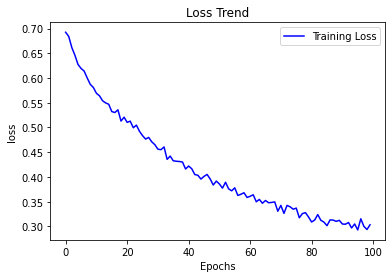

In [12]:
loss = history.losses

plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss Trend')
plt.plot(loss, 'blue' , label = "Training Loss")
plt.legend()
plt.show()

In [54]:
pre = model.predict(X_test[0:10] , verbose = 0)

pre_ans = pre[0:10]
label_ans = Y_test[0:10]

False , this is  cats


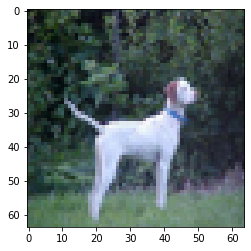

True , this is  dogs


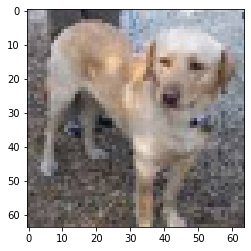

True , this is  dogs


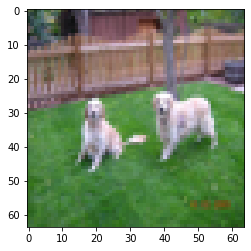

True , this is  cats


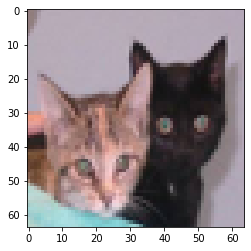

False , this is  cats


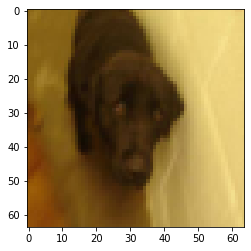

False , this is  cats


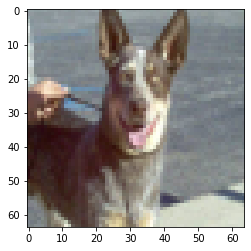

True , this is  dogs


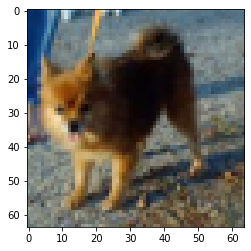

False , this is  dogs


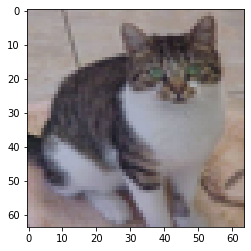

True , this is  dogs


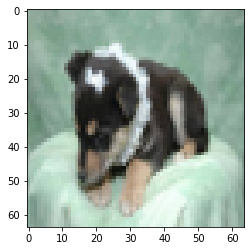

False , this is  cats


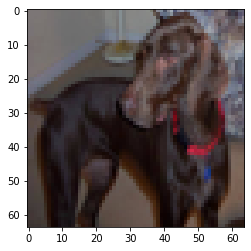

In [56]:
for i in range(0,10):
  pre1 = pre_ans[i].argmax() 
  pre2 = label_ans[i].argmax()

  if (pre1 == pre2):
    print("True , this is " , categories[pre1])

  elif (pre1 != pre2):
    print("False , this is ",categories[pre1])

  plt.imshow(X_test[i])
  plt.show()